In [15]:
print("Name : NARASIMHAN S")
print("Reg.No : 212223230133")

Name : NARASIMHAN S
Reg.No : 212223230133


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("CarPrice_Assignment.csv")
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [4]:
# Data preprocessing
# Dropping unnecessary columns and handling categorical variables
data = data.drop(['CarName', 'car_ID'], axis=1)
data = pd.get_dummies(data, drop_first=True)


In [5]:
# Splitting the data into features and target variable
X = data.drop('price', axis=1)
y = data['price']

scaler = StandardScaler()


In [6]:
# Standardizing the data
#scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1, 1)).flatten()

In [7]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Creating the SGD Regressor model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)

In [9]:
# Fitting the model on the training data
sgd_model.fit(X_train, y_train)

# Making predictions
y_pred = sgd_model.predict(X_test)


In [10]:
# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print("="*50)
print("Mean Squared Error:", mse)
print("R² Score:", r2)
# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("="*50)

Mean Squared Error: 0.20787934477035774
R² Score: 0.8327611431950506
Mean Squared Error: 0.20787934477035774
R-squared Score: 0.8327611431950506


In [12]:
# Print model coefficients
print("Model Coefficients:")
print("Coefficients:", sgd_model.coef_)
print("Intercept:", sgd_model.intercept_)

Model Coefficients:
Coefficients: [ 0.04093284  0.11279563 -0.00677789  0.18787325  0.01985766  0.18716727
  0.32281971 -0.03225756 -0.09257856 -0.00508124  0.10210912  0.04458044
 -0.03792277 -0.05163251 -0.02080265  0.02406695  0.0156584  -0.030637
 -0.10187683 -0.02542718 -0.09869858 -0.03030779  0.0636246   0.21436263
  0.00905712 -0.10325651  0.08237133 -0.01464674 -0.0065611   0.01274495
 -0.05416834 -0.15648787 -0.09008698  0.00095885 -0.03582349  0.01274495
 -0.00357546 -0.01828557  0.02080265 -0.01949238 -0.03862132 -0.04446007
 -0.01716151]
Intercept: [-0.0137011]


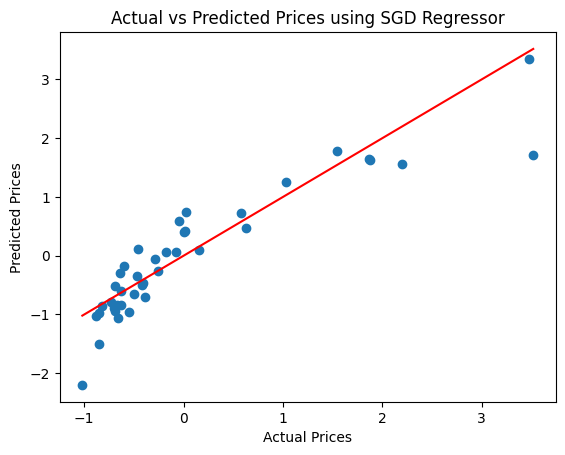

In [13]:
# Visualizing actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect prediction line
plt.show()

In [17]:
print("Name : NARASIMHAN S")
print("Reg.No : 212223230133")

Name : NARASIMHAN S
Reg.No : 212223230133
